In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
 

In [11]:
old = pd.read_csv("/Users/harshgovindji/Desktop/coinbase/trading_volume/data/gdax-trading-volume-1-year.csv")
new = pd.read_csv("/Users/harshgovindji/Desktop/coinbase/trading_volume/data/updated_trading_volume.csv")

In [15]:
old.tail(5)

,snapped_at,volume,day,__src_rank
360,2025-09-20 10:30:00+00:00,2.170311e+09,2025-09-20 00:00:00+00:00,0
361,2025-09-21 10:30:00+00:00,1.732877e+09,2025-09-21 00:00:00+00:00,0
362,2025-09-22 10:30:00+00:00,3.363763e+09,2025-09-22 00:00:00+00:00,0
363,2025-09-23 10:30:00+00:00,3.331788e+09,2025-09-23 00:00:00+00:00,0
364,2025-09-24 10:30:00+00:00,2.658478e+09,2025-09-24 00:00:00+00:00,0


In [22]:
import pandas as pd


# Convert to datetime
old["snapped_at"] = pd.to_datetime(old["snapped_at"], utc=True)
new["snapped_at"] = pd.to_datetime(new["snapped_at"], utc=True)

# Keep only new rows that occur after the last date in old
cutoff = old["snapped_at"].max()
new_trimmed = new[new["snapped_at"] > cutoff]

# Combine
combined = pd.concat([old, new_trimmed], ignore_index=True)

# Sort and reset index
combined = combined.sort_values("snapped_at").reset_index(drop=True)

print(combined.tail())


                   snapped_at        volume                       day  \
383 2025-10-12 14:20:00+00:00  3.040480e+09 2025-10-12 00:00:00+00:00   
384 2025-10-13 14:20:00+00:00  4.438370e+09 2025-10-13 00:00:00+00:00   
385 2025-10-14 14:20:00+00:00  4.494601e+09 2025-10-14 00:00:00+00:00   
386 2025-10-15 14:20:00+00:00  3.567669e+09 2025-10-15 00:00:00+00:00   
387 2025-10-16 14:20:00+00:00  3.224611e+09 2025-10-16 00:00:00+00:00   

     __src_rank  
383           1  
384           1  
385           1  
386           1  
387           1  


In [23]:
combined

,snapped_at,volume,day,__src_rank
0,2024-09-25 10:30:00+00:00,1.843681e+09,2024-09-25 00:00:00+00:00,0
1,2024-09-26 10:30:00+00:00,1.490229e+09,2024-09-26 00:00:00+00:00,0
2,2024-09-27 10:30:00+00:00,2.621829e+09,2024-09-27 00:00:00+00:00,0
3,2024-09-28 10:30:00+00:00,2.052360e+09,2024-09-28 00:00:00+00:00,0
4,2024-09-29 10:30:00+00:00,8.589400e+08,2024-09-29 00:00:00+00:00,0
...,...,...,...,...
383,2025-10-12 14:20:00+00:00,3.040480e+09,2025-10-12 00:00:00+00:00,1
384,2025-10-13 14:20:00+00:00,4.438370e+09,2025-10-13 00:00:00+00:00,1
385,2025-10-14 14:20:00+00:00,4.494601e+09,2025-10-14 00:00:00+00:00,1
386,2025-10-15 14:20:00+00:00,3.567669e+09,2025-10-15 00:00:00+00:00,1


In [39]:
import pandas as pd

# Assume 'combined' already exists from your previous step
# and has columns ['snapped_at', 'volume']

# Ensure timestamp is datetime
combined["snapped_at"] = pd.to_datetime(combined["snapped_at"], utc=True)

# Create a 'Quarter' column like '2025Q1', '2025Q2', etc.
combined["Quarter"] = combined["snapped_at"].dt.to_period("Q").astype(str)

# Group by quarter and sum total trading volume
quarterly = (
    combined.groupby("Quarter", as_index=False)["volume"]
            .sum()
            .rename(columns={"volume": "total_volume"})
)

print(quarterly)


  Quarter  total_volume
0  2024Q3  1.034274e+10
1  2024Q4  4.234482e+11
2  2025Q1  3.786961e+11
3  2025Q2  2.287097e+11
4  2025Q3  2.858244e+11
5  2025Q4  5.944573e+10


/var/folders/tb/zk15pcq16yng7wq853lq67ph0000gn/T/ipykernel_81669/958471479.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  combined["Quarter"] = combined["snapped_at"].dt.to_period("Q").astype(str)


In [46]:
quarterly.iloc[-1]["total_volume"]

59445734616.13996

In [48]:
# Ensure total_volume is numeric
quarterly["total_volume"] = (
    quarterly["total_volume"]
    .astype(str)                     # make sure it's string
    .str.replace(",", "")            # remove commas if any
    .astype(float)                   # convert to float
)

# Compute percent change for last two quarters
vol_change = (
    (quarterly.iloc[-2]["total_volume"] - quarterly.iloc[-3]["total_volume"])
    / quarterly.iloc[-3]["total_volume"]
) * 100

print(f"Percent change in trading volume (QoQ): {vol_change:.2f}%")

# Optional: add full column of QoQ % changes
quarterly["pct_change_volume"] = quarterly["total_volume"].pct_change()

Percent change in trading volume (QoQ): 24.97%


In [32]:
revenue = pd.DataFrame({
    "Quarter": ["2024Q4", "2025Q1", "2025Q2"],
    "Consumer": [1347.1, 1095.5, 649.9],
    "Institutional": [141.3, 98.9, 60.8],
    "Other": [67.6, 67.8, 53.5]
})
revenue["Total"] = revenue[["Consumer", "Institutional", "Other"]].sum(axis=1)

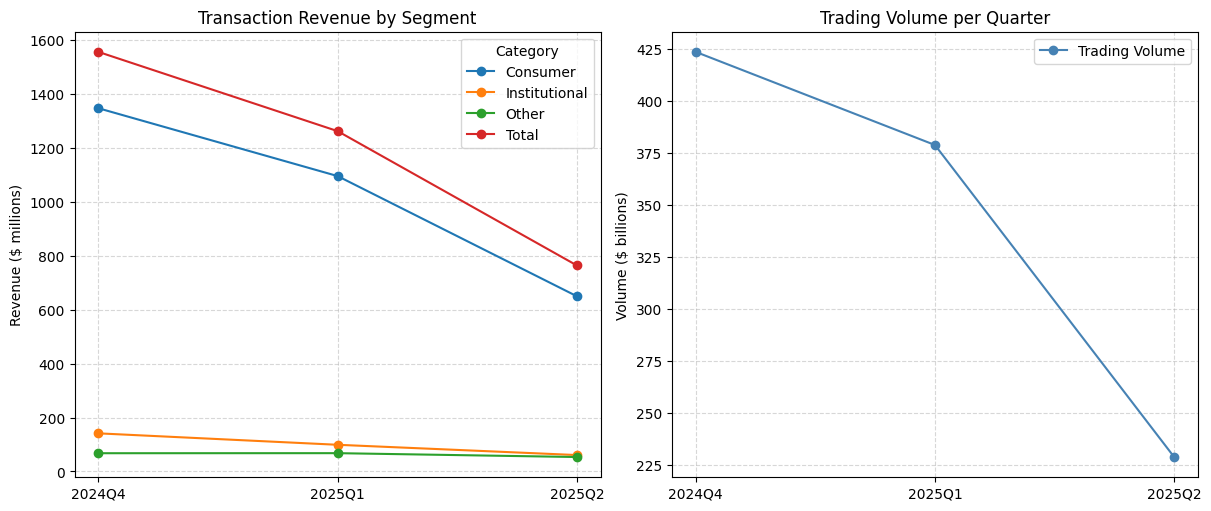

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣ Revenue Data
# ============================================================
revenue = pd.DataFrame({
    "Quarter": ["2024Q4", "2025Q1", "2025Q2"],
    "Consumer": [1347.1, 1095.5, 649.9],
    "Institutional": [141.3, 98.9, 60.8],
    "Other": [67.6, 67.8, 53.5]
})
revenue["Total"] = revenue[["Consumer", "Institutional", "Other"]].sum(axis=1)

# ============================================================
# 2️⃣ Quarterly Trading Volume (from your earlier aggregation)
# ============================================================
# Example — replace this with your actual `quarterly` df
quarterly = pd.DataFrame({
    "Quarter": ["2024Q4", "2025Q1", "2025Q2"],
    "total_volume": [4.234482e+11, 3.786961e+11, 2.287097e+11]  # example totals
})

# ============================================================
# 3️⃣ Plot — side-by-side line charts
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# --- Left: Revenue components ---
for col in ["Consumer", "Institutional", "Other", "Total"]:
    axes[0].plot(revenue["Quarter"], revenue[col], marker="o", label=col)

axes[0].set_title("Transaction Revenue by Segment")
axes[0].set_ylabel("Revenue ($ millions)")
axes[0].legend(title="Category")
axes[0].grid(True, linestyle="--", alpha=0.5)

# --- Right: Trading Volume ---
axes[1].plot(quarterly["Quarter"], quarterly["total_volume"] / 1e9,
             marker="o", color="steelblue", label="Trading Volume")
axes[1].set_title("Trading Volume per Quarter")
axes[1].set_ylabel("Volume ($ billions)")
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].legend()

plt.show()


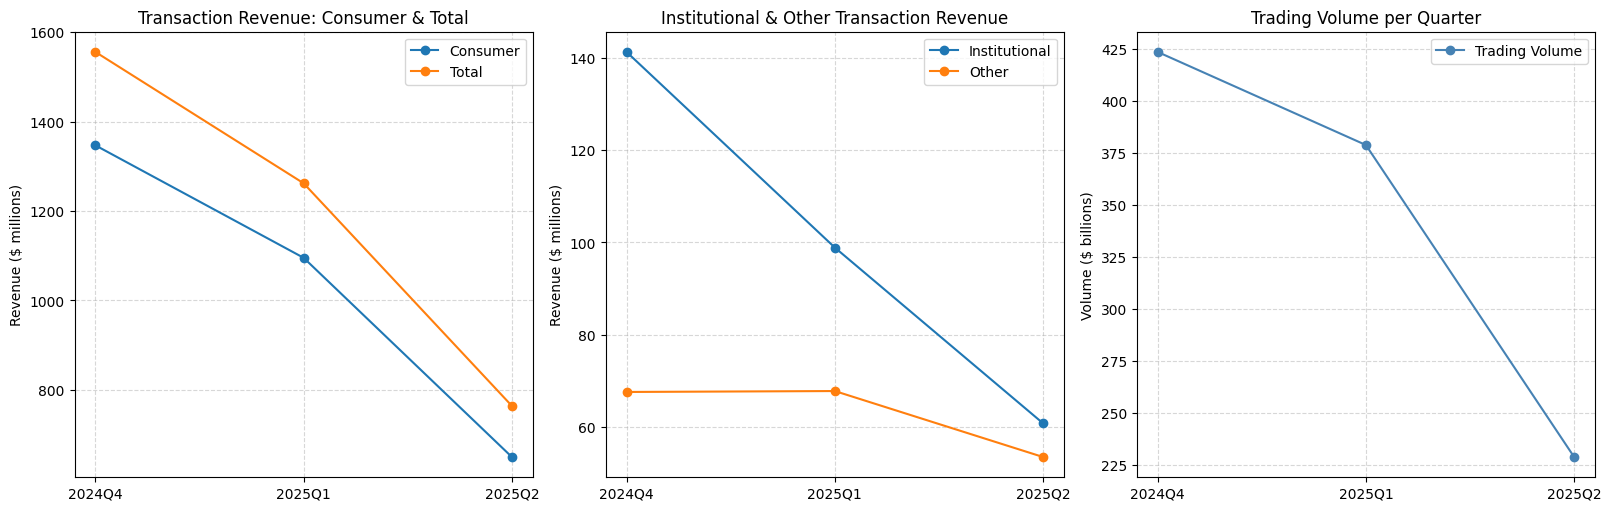

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣ Revenue Data
# ============================================================
revenue = pd.DataFrame({
    "Quarter": ["2024Q4", "2025Q1", "2025Q2"],
    "Consumer": [1347.1, 1095.5, 649.9],
    "Institutional": [141.3, 98.9, 60.8],
    "Other": [67.6, 67.8, 53.5]
})
revenue["Total"] = revenue[["Consumer", "Institutional", "Other"]].sum(axis=1)

# ============================================================
# 2️⃣ Trading Volume Data (from quarterly df)
# ============================================================
quarterly = pd.DataFrame({
    "Quarter": ["2024Q4", "2025Q1", "2025Q2"],
    "total_volume": [4.234482e+11, 3.786961e+11, 2.287097e+11]  # example totals
})

# ============================================================
# 3️⃣ Plot — Three aligned line charts
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(16, 5), constrained_layout=True)

# --- Left: Consumer + Total ---
for col in ["Consumer", "Total"]:
    axes[0].plot(revenue["Quarter"], revenue[col], marker="o", label=col)
axes[0].set_title("Transaction Revenue: Consumer & Total")
axes[0].set_ylabel("Revenue ($ millions)")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.5)

# --- Middle: Institutional + Other ---
for col in ["Institutional", "Other"]:
    axes[1].plot(revenue["Quarter"], revenue[col], marker="o", label=col)
axes[1].set_title("Institutional & Other Transaction Revenue")
axes[1].set_ylabel("Revenue ($ millions)")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.5)

# --- Right: Trading Volume ---
axes[2].plot(quarterly["Quarter"], quarterly["total_volume"] / 1e9,
             marker="o", color="steelblue", label="Trading Volume")
axes[2].set_title("Trading Volume per Quarter")
axes[2].set_ylabel("Volume ($ billions)")
axes[2].legend()
axes[2].grid(True, linestyle="--", alpha=0.5)

plt.show()


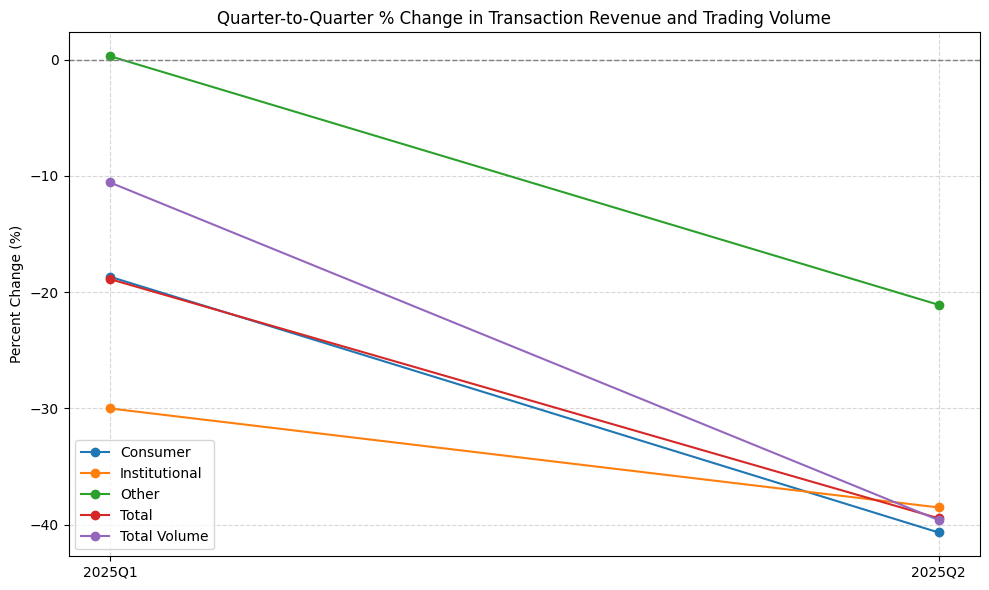

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣ Revenue Data
# ============================================================
revenue = pd.DataFrame({
    "Quarter": ["2024Q4", "2025Q1", "2025Q2"],
    "Consumer": [1347.1, 1095.5, 649.9],
    "Institutional": [141.3, 98.9, 60.8],
    "Other": [67.6, 67.8, 53.5]
})
revenue["Total"] = revenue[["Consumer", "Institutional", "Other"]].sum(axis=1)

# ============================================================
# 2️⃣ Trading Volume Data (from quarterly df)
# ============================================================
quarterly = pd.DataFrame({
    "Quarter": ["2024Q4", "2025Q1", "2025Q2"],
    "total_volume": [4.234482e+11, 3.786961e+11, 2.287097e+11]  # example totals
})

# ============================================================
# 3️⃣ Merge and compute % change QoQ
# ============================================================
# Merge the two datasets on Quarter
df = pd.merge(revenue, quarterly, on="Quarter", how="inner")

# Compute percent change from previous quarter
pct_change = df.copy()
pct_change.set_index("Quarter", inplace=True)
pct_change = pct_change.pct_change() * 100  # convert to %

# Reset index for plotting
pct_change = pct_change.reset_index()

# ============================================================
# 4️⃣ Plot — Percent change comparison
# ============================================================
plt.figure(figsize=(10, 6))

for col in ["Consumer", "Institutional", "Other", "Total", "total_volume"]:
    plt.plot(pct_change["Quarter"], pct_change[col],
             marker="o", label=col.replace("_", " ").title())

plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Quarter-to-Quarter % Change in Transaction Revenue and Trading Volume")
plt.ylabel("Percent Change (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [49]:
import pandas as pd

# ============================================================
# 1️⃣ Historical data
# ============================================================
data = pd.DataFrame({
    "Quarter": ["2024Q4", "2025Q1", "2025Q2"],
    "Consumer": [1347.1, 1095.5, 649.9],
    "Institutional": [141.3, 98.9, 60.8],
    "Other": [67.6, 67.8, 53.5],
    "Total": [1556.0, 1262.2, 764.3],
    "TradingVolume": [4.234482e+11, 3.786961e+11, 2.287097e+11]
})

# ============================================================
# 2️⃣ Compute percent changes QoQ
# ============================================================
df = data.copy()
df.set_index("Quarter", inplace=True)
pct = df.pct_change() * 100  # percent change in %

# drop the first NaN row
pct = pct.dropna()

# ============================================================
# 3️⃣ Estimate elasticities (%ΔRevenue / %ΔVolume)
# ============================================================
elasticities = {}
for col in ["Consumer", "Institutional", "Other", "Total"]:
    elasticities[col] = (pct[col] / pct["TradingVolume"]).mean()

elasticities = pd.Series(elasticities, name="Elasticity")
print("Elasticities:")
print(elasticities.round(2))

# ============================================================
# 4️⃣ Forecast trading volume change for 2025Q3 (user input)
# ============================================================
# Example: assume trading volume is expected to rise +8% QoQ
forecast_volume_change = 24.97  # %

# ============================================================
# 5️⃣ Forecast revenue % changes using elasticities
# ============================================================
forecast_changes = elasticities * forecast_volume_change

# ============================================================
# 6️⃣ Apply to last known revenues (2025Q2)
# ============================================================
last = df.loc["2025Q2", ["Consumer", "Institutional", "Other", "Total"]]

forecast_revenue = last * (1 + forecast_changes / 100)
forecast_revenue.name = "2025Q3 (Forecast)"

# Combine for display
forecast_df = pd.concat([last.rename("2025Q2"), forecast_revenue], axis=1)
forecast_df["%Change (Forecast)"] = forecast_changes

print("\nQ3 2025 Forecasted Revenues:")
print(forecast_df.round(2))


Elasticities:
Consumer         1.40
Institutional    1.91
Other            0.25
Total            1.39
Name: Elasticity, dtype: float64

Q3 2025 Forecasted Revenues:
               2025Q2  2025Q3 (Forecast)  %Change (Forecast)
Consumer        649.9             876.63               34.89
Institutional    60.8              89.74               47.59
Other            53.5              56.87                6.30
Total           764.3            1029.82               34.74


In [1]:
import pandas as pd 

df = pd.read_csv("/Users/harshgovindji/Desktop/coinbase/trading_volume/data/btc-usd-max.csv")

In [2]:
df

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.300000,1.500518e+09,0.000000e+00
1,2013-04-29 00:00:00 UTC,141.960000,1.575032e+09,0.000000e+00
2,2013-04-30 00:00:00 UTC,135.300000,1.501657e+09,0.000000e+00
3,2013-05-01 00:00:00 UTC,117.000000,1.298952e+09,0.000000e+00
4,2013-05-02 00:00:00 UTC,103.430000,1.148668e+09,0.000000e+00
...,...,...,...,...
4551,2025-10-15 00:00:00 UTC,113156.569438,2.257545e+12,9.121185e+10
4552,2025-10-16 00:00:00 UTC,110708.669609,2.207742e+12,6.887733e+10
4553,2025-10-17 00:00:00 UTC,108076.728620,2.154965e+12,8.477316e+10
4554,2025-10-18 00:00:00 UTC,106443.611950,2.123018e+12,9.432524e+10


In [3]:
# Assuming df is your DataFrame
df['snapped_at'] = pd.to_datetime(df['snapped_at'])

# Create a Quarter column (e.g., 2013Q2)
df['Quarter'] = df['snapped_at'].dt.to_period('Q')

# Compute average price by quarter
quarterly_avg = df.groupby('Quarter')['price'].mean().reset_index()

# Optional: convert to string format for readability
quarterly_avg['Quarter'] = quarterly_avg['Quarter'].astype(str)

print(quarterly_avg.head())

  Quarter       price
0  2013Q2  114.935133
1  2013Q3  111.267145
2  2013Q4  499.484783
3  2014Q1  701.846500
4  2014Q2  518.672336


/var/folders/tb/zk15pcq16yng7wq853lq67ph0000gn/T/ipykernel_22838/588710021.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Quarter'] = df['snapped_at'].dt.to_period('Q')


In [4]:
quarterly_avg

,Quarter,price
0,2013Q2,114.935133
1,2013Q3,111.267145
2,2013Q4,499.484783
3,2014Q1,701.846500
4,2014Q2,518.672336
5,2014Q3,532.142327
6,2014Q4,355.302657
7,2015Q1,250.869934
8,2015Q2,236.595498
9,2015Q3,254.778983


In [5]:
# Assuming df is your DataFrame
df = pd.read_csv("/Users/harshgovindji/Desktop/coinbase/trading_volume/data/dpi-usd-max.csv")
df['snapped_at'] = pd.to_datetime(df['snapped_at'])

# Create a Quarter column (e.g., 2013Q2)
df['Quarter'] = df['snapped_at'].dt.to_period('Q')

# Compute average price by quarter
quarterly_avg = df.groupby('Quarter')['price'].mean().reset_index()

# Optional: convert to string format for readability
quarterly_avg['Quarter'] = quarterly_avg['Quarter'].astype(str)

print(quarterly_avg.head())

  Quarter       price
0  2020Q3  106.637422
1  2020Q4   92.415648
2  2021Q1  346.320084
3  2021Q2  423.720746
4  2021Q3  343.708709


/var/folders/tb/zk15pcq16yng7wq853lq67ph0000gn/T/ipykernel_22838/1737823519.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Quarter'] = df['snapped_at'].dt.to_period('Q')


In [6]:
quarterly_avg

,Quarter,price
0,2020Q3,106.637422
1,2020Q4,92.415648
2,2021Q1,346.320084
3,2021Q2,423.720746
4,2021Q3,343.708709
5,2021Q4,325.331300
6,2022Q1,192.967849
7,2022Q2,124.501850
8,2022Q3,92.009435
9,2022Q4,74.023279
